<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Dropout%20and%20Batch%20Normalization%20-%202D%20CNN%20-%20Dog%20vs%20Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Dropout and Batch Normalization - 2D CNN - Dog vs Cat**

**What is Dropout**

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.
Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

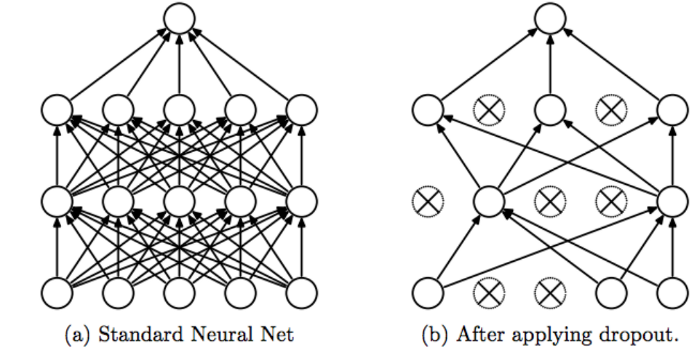

**What is Batch Normalization**

Batch normalization (also known as batch norm) is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling

**VGG16 Model**

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

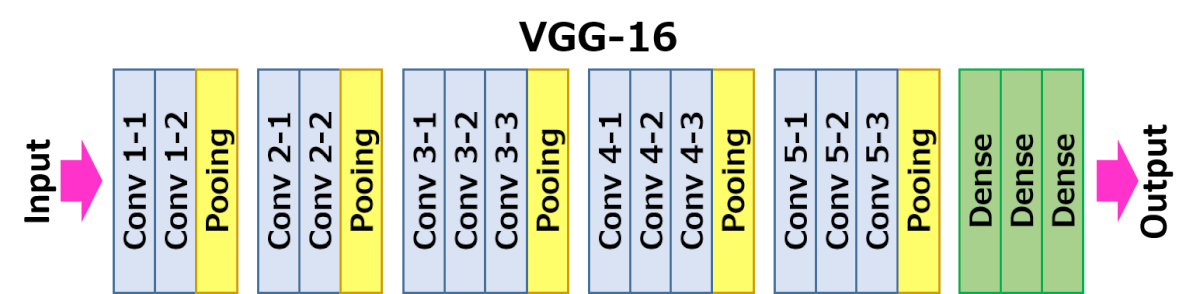

**Import Libraries**

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator # To convert image in to array

In [3]:
print(tf.__version__)

2.8.0


In [33]:
import numpy as np
import matplotlib.pyplot as plt

**Download Dataset**

In [4]:
# Downloading Data
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
Updating files:   2% (732/25001)
Updating files:   3% (751/25001)
Updating files:   4% (1001/25001)
Updating files:   5% (1251/25001)
Updating files:   5% (1397/25001)
Updating files:   6% (1501/25001)
Updating files:   7% (1751/25001)
Updating files:   8% (2001/25001)
Updating files:   8% (2040/25001)
Updating files:   9% (2251/25001)
Updating files:  10% (2501/25001)
Updating files:  10% (2656/25001)
Updating files:  11% (2751/25001)
Updating files:  12% (3001/25001)
Updating files:  12% (3224/25001)
Updating files:  13% (3251/25001)
Updating files:  14% (3501/25001)
Updating files:  15% (3751/25001)
Updating files:  15% (3824/25001)
Updating files:  16% (4001/25001)
Updating files:  17% (4251/25001)
Updating files:  17% (4474/25001)
Updating files:  18% (4501/25001)
Updating files:  19% (4751/25001)
Updating files:  20% (5001/25001)
Updating files:  20% (5124/25001)
Updating files:  21% (5251/25001)
Updating files:  22% (5501/25001)
Updating fi

In [11]:
# Now data is available. Setting path to fetch it from. 
# Its available in below paths. Also, can see in the folder structure here.
test_data_dir = "dog-cat-full-dataset/data/test"
train_data_dir = "dog-cat-full-dataset/data/train"

In [12]:
# Since the size of our original data are very large. Setting it to 32 x 32.
img_width = 32
img_height = 32
batch_size = 20

**Generate Dataset**

In [13]:
# Generate batches of tensor image data with real-time data augmentation.
datagen = ImageDataGenerator(rescale=1./255) #Rescalling all data between 0 to 1. 

In [35]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              target_size=(img_width, img_height),
                                              classes=["dogs", "cats"], #Name as in our dataset directory
                                              class_mode="binary", #0 is dogs and 1 is cats, as its binary setting it to binary here
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [15]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir, 
                                              target_size=(img_width, img_height),
                                              classes=["dogs", "cats"], #Name as in our dataset directory
                                              class_mode="binary", #0 is dogs and 1 is cats, as its binary setting it to binary here
                                              batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [17]:
# Since processing in batch the first batch size is 1000. 1000 x 20 = 20000. 20 is batch_size.
len(train_generator) 

1000

**Base Model**

In [36]:
model = Sequential()

model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))

model.add(MaxPool2D(2, 2))

model.add(Flatten()) # Converting 2D to 1D.

model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [39]:
model.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [40]:
history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=5, 
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/5
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6970 - accuracy: 0.5131 - val_loss: 0.6779 - val_accuracy: 0.5802
Epoch 2/5
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6762 - accuracy: 0.5745 - val_loss: 0.6613 - val_accuracy: 0.6100
Epoch 3/5
1000/1000 [==============================] - 92s 92ms/step - loss: 0.6358 - accuracy: 0.6380 - val_loss: 0.5731 - val_accuracy: 0.6970
Epoch 4/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.5553 - accuracy: 0.7181 - val_loss: 0.5355 - val_accuracy: 0.7374
Epoch 5/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.5101 - accuracy: 0.7482 - val_loss: 0.5469 - val_accuracy: 0.7164


In [41]:
history.history

{'loss': [0.6970173120498657,
  0.6762334108352661,
  0.6358018517494202,
  0.5552752614021301,
  0.5100969672203064],
 'accuracy': [0.5131000280380249,
  0.5745499730110168,
  0.6380000114440918,
  0.7180500030517578,
  0.748199999332428],
 'val_loss': [0.6778998970985413,
  0.6613332629203796,
  0.5731090307235718,
  0.5355485081672668,
  0.5469407439231873],
 'val_accuracy': [0.5802000164985657,
  0.6100000143051147,
  0.6970000267028809,
  0.7373999953269958,
  0.7164000272750854]}

In [42]:
epoch_range = range(1, 6) # No of Epochs used to train. 6 - 1 = 5

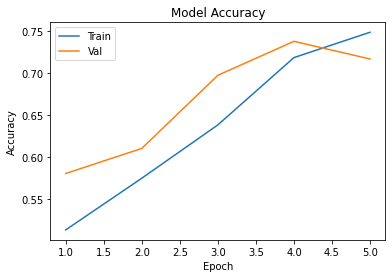

In [43]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

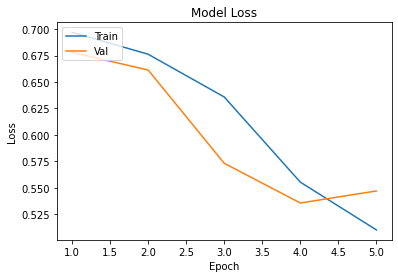

In [44]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

**First 3 Block of VGG16 Model**

In [45]:
model = Sequential()
model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(
    filters=256, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(MaxPool2D(2, 2))

model.add(Flatten()) # Converting 2D to 1D.

model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.


In [46]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [47]:
model.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [48]:
history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=5, 
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/5
1000/1000 [==============================] - 121s 121ms/step - loss: 0.7008 - accuracy: 0.5046 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 139s 139ms/step - loss: 0.6936 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 3/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.6934 - accuracy: 0.4973 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 169s 169ms/step - loss: 0.6936 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000


The above model gives 50% accuracy which is pretty bad. So lets add batch normalization.

In [49]:
model = Sequential()
model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2)) # Dropping 20% of neurons randomly

model = Sequential()
model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3)) # Dropping 30% of neurons randomly

model = Sequential()
model.add(Conv2D(
    filters=256, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5)) # Dropping 50% of neurons randomly

model.add(Flatten()) # Converting 2D to 1D.
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(Dropout(0.5)) # Dropping 50% of neurons randomly

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.


In [50]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [51]:
model.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [52]:
history = model.fit(
    train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=10, # Increased epoch from 5 to 10
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/10
1000/1000 [==============================] - 220s 219ms/step - loss: 0.6609 - accuracy: 0.6394 - val_loss: 0.5832 - val_accuracy: 0.7026
Epoch 2/10
1000/1000 [==============================] - 274s 274ms/step - loss: 0.5840 - accuracy: 0.6965 - val_loss: 0.5525 - val_accuracy: 0.7322
Epoch 3/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.5504 - accuracy: 0.7223 - val_loss: 0.5135 - val_accuracy: 0.7534
Epoch 4/10
1000/1000 [==============================] - 195s 194ms/step - loss: 0.5213 - accuracy: 0.7456 - val_loss: 0.5225 - val_accuracy: 0.7446
Epoch 5/10
1000/1000 [==============================] - 157s 157ms/step - loss: 0.5027 - accuracy: 0.7552 - val_loss: 0.5222 - val_accuracy: 0.7580
Epoch 6/10
1000/1000 [==============================] - 176s 176ms/step - loss: 0.4886 - accuracy: 0.7649 - val_loss: 0.5396 - val_accuracy: 0.7334
Epoch 7/10
1000/1000 [==============================] - 181s 181ms/step - loss: 0.4784 - accuracy: 0.7703 - val_

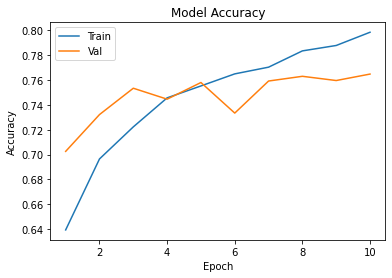

In [53]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(range(1, 11), history.history["accuracy"])
plt.plot(range(1, 11), history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

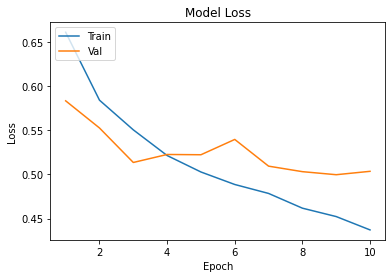

In [54]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(range(1, 11), history.history["loss"])
plt.plot(range(1, 11), history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()